In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [26]:
stations = pandas.read_csv('../../data/stations_pos.csv')

In [27]:
stations.shape

(73, 3)

In [28]:
def convert_coord(x):
    coord_array = x.split(' ')
    res = np.float32(coord_array[0])*1.0
    res += np.float32(coord_array[1])/60.0
    res += np.float32(coord_array[2])/3600.0
    return res

In [29]:
stations_new = stations
stations_new['lon'] = stations['lon'].map(convert_coord)
stations_new['lat'] = stations['lat'].map(convert_coord)

stations_new_1 = stations_new
stations_new_1 = stations_new[stations_new['lon']>50]
#stations_new_1 = stations_new_1[stations_new_1['lat']<50]

In [40]:
stations_new_1.to_csv('considered_stations.csv')

In [39]:
np.min(stations_new_1[['lon', 'lat']].values, axis=0)

array([ 53.27777778,  52.20888889])

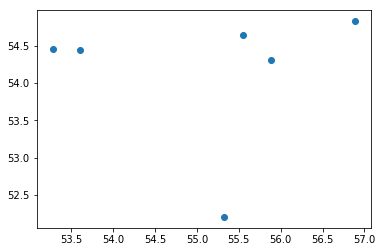

In [33]:
plt.scatter(stations_new_1['lon'], stations_new_1['lat'])
plt.show()

In [12]:
%pylab inline
import matplotlib.pylab as plt
from matplotlib.toolkits.basemap import Basemap

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
 
x=stations_new['lon']
y=stations_new['lat']
m = Basemap(llcrnrlon=-8.0,llcrnrlat=54.5,urcrnrlon=1.5,urcrnrlat=59.5,lat_ts=20,
            resolution='h',projection='merc',lon_0=-4.36,lat_0=54.5)
x1,y1=m(x,y)
m.drawmapboundary(fill_color='white') # fill to edge
m.scatter(x1,y1,s=5,c='r',marker="o",cmap=cm.jet,alpha=1.0)


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


ImportError: No module named 'matplotlib.toolkits'

## Features extractor

In [2]:
station_115 = pandas.read_csv('115_filtered.csv')

In [3]:
station_115

Unnamed: 0  station_id            date_time  dampness  pressure  t_air  \
0               0         115  2012-09-17 18:08:05     842.0    7431.0  138.0   
1               1         115  2012-09-17 18:38:20     947.0    7431.0  126.0   
2               2         115  2012-09-17 19:08:35     933.0    7439.0  127.0   
3               3         115  2012-09-17 19:38:50     967.0    7439.0  120.0   
4               4         115  2012-09-17 20:09:05     970.0    7439.0  118.0   
5               5         115  2012-09-17 20:39:20     996.0    7439.0  118.0   
6               6         115  2012-09-17 21:09:34     975.0    7439.0  122.0   
7               7         115  2012-09-17 21:39:50     945.0    7439.0  122.0   
8               8         115  2012-09-17 22:10:04     915.0    7439.0  121.0   
9               9         115  2012-09-17 22:40:19     896.0    7439.0  123.0   
10             10         115  2012-09-17 23:10:34     885.0    7439.0  120.0   
11             11         115  2012-09-17 23:40:49     879.0    7439.0  122.0   
12             12         115  2012-09-18 00:11:03     874.0    7439.0  122.0   
13             13         115  2012-09-18 00:41:18     863.0    7439.0  123.0   
14             14         115  2012-09-18 01:11:33     844.0    7447.0  124.0   
15             15         115  2012-09-18 01:41:47     827.0    7439.0  126.0   
16             16         115  2012-09-18 02:12:02     806.0    7439.0  126.0   
17             17         115  2012-09-18 02:42:45     801.0    7447.0  123.0   
18             18         115  2012-09-18 03:13:42     795.0    7447.0  124.0   
19             19         115  2012-09-18 03:43:57     788.0    7447.0  123.0   
20             20         115  2012-09-18 04:14:11     795.0    7439.0  115.0   
21             21         115  2012-09-18 04:44:26     821.0    7439.0  108.0   
22             22         115  2012-09-18 05:14:40     832.0    7439.0  104.0   
23             23         115  2012-09-18 05:27:32     849.0    7447.0  100.0   
24             24         115  2012-09-18 05:57:48     859.0    7447.0   99.0   
25             25         115  2012-09-18 06:28:03     858.0    7447.0  100.0   
26             26         115  2012-09-18 06:58:17     871.0    7447.0   98.0   
27             27         115  2012-09-18 07:28:32     852.0    7447.0  104.0   
28             28         115  2012-09-18 07:58:46     840.0    7447.0  109.0   
29             29         115  2012-09-18 08:29:01     834.0    7455.0  114.0   
...           ...         ...                  ...       ...       ...    ...   
63804       63804         115  2016-07-13 02:38:12    1000.0    7460.0  104.0   
63805       63805         115  2016-07-13 03:08:28    1000.0    7460.0  103.0   
63806       63806         115  2016-07-13 03:38:44    1000.0    7460.0  100.0   
63807       63807         115  2016-07-13 04:08:59    1000.0    7460.0  107.0   
63808       63808         115  2016-07-13 04:39:15    1000.0    7460.0  114.0   
63809       63809         115  2016-07-13 05:09:30    1000.0    7460.0  136.0   
63810       63810         115  2016-07-13 05:39:51    1000.0    7460.0  160.0   
63811       63811         115  2016-07-13 06:10:08    1000.0    7460.0  180.0   
63812       63812         115  2016-07-13 06:40:24     825.0    7460.0  197.0   
63813       63813         115  2016-07-13 07:10:47     781.0    7460.0  204.0   
63814       63814         115  2016-07-13 07:41:07     756.0    7460.0  208.0   
63815       63815         115  2016-07-13 08:11:23     698.0    7460.0  222.0   
63816       63816         115  2016-07-13 08:41:40     584.0    7460.0  224.0   
63817       63817         115  2016-07-13 09:11:56     563.0    7460.0  232.0   
63818       63818         115  2016-07-13 09:42:14     545.0    7460.0  226.0   
63819       63819         115  2016-07-13 10:12:38     528.0    7450.0  240.0   
63820       63820         115  2016-07-13 11:07:21     551.0    7450.0  241.0   
63821       63821         115  2016-07